# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
# pages = 10
# page_size = 100

# reviews = []

# # for i in range(1, pages + 1):
# for i in range(1, pages + 1):

#     print(f"Scraping page {i}")

#     # Create URL to collect links from paginated data
#     url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

#     # Collect HTML data from this page
#     response = requests.get(url)

#     # Parse content
#     content = response.content
#     parsed_content = BeautifulSoup(content, 'html.parser')
#     for para in parsed_content.find_all("div", {"class": "text_content"}):
#         reviews.append(para.get_text())
    
#     print(f"   ---> {len(reviews)} total reviews")

In [3]:
# df = pd.DataFrame()
# df["reviews"] = reviews
# df.head()

In [4]:
# df.to_csv("BA_reviews.csv",header= True,index=False)

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
# df.head(10)

In [6]:
from tqdm.notebook import tqdm
import re

In [7]:
# import re

# for i, review in enumerate(df['reviews']):
#     review = re.sub('Not Verified \|', '', review)
#     review = re.sub('✅ Trip Verified \|', '', review)
#     review = review.strip()
#     df.loc[i, 'reviews'] = review


In [8]:
# df.head()

In [9]:
# df.to_csv('cleanded review.csv',header=True,index= False)

In [10]:
reviewdf = pd.read_csv(r'D:\internship\BA\cleanded review.csv')
reviewdf.head()

,reviews
0,Food was lousy. Who ever is planning the Asian...
1,Had the worst experience. The flight from Lond...
2,The ground staff were not helpful. Felt like a...
3,Second time BA Premium Economy in a newer airc...
4,They changed our Flights from Brussels to Lond...


# Sentiment analysis using vader model


In [11]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [12]:
example = reviewdf['reviews'][0]
print(example)
sia.polarity_scores(example)

Food was lousy. Who ever is planning the Asian Hindu Vegetarian meal is clueless as to what this meal includes. The snack was also lousy. It took us 2 hours just to go from T5 to T3 and clear security check. The place was chaotic. We get to our boarding gate and again a long line with 40 minutes wait for someone to check passport and boarding pass. Seats in Premium economy was ok, but when the passenger in front reclines, there is very little space for the window seat passenger to cross over. Overall not a good airline.


{'neg': 0.11, 'neu': 0.842, 'pos': 0.049, 'compound': -0.7476}

In [13]:
vader = {'reviews':[],'neg' : [],'neu':[],'pos':[],'compound':[]}
for i, review in tqdm(enumerate(reviewdf['reviews']),total= len(reviewdf)):
    polarity_Score = sia.polarity_scores(review)
    vader['reviews'].append(review)
    vader['neg'].append(polarity_Score['neg'])
    vader['neu'].append(polarity_Score['neu'])
    vader['pos'].append(polarity_Score['pos'])
    vader['compound'].append(polarity_Score['compound'])

  0%|          | 0/1000 [00:00<?, ?it/s]

In [14]:
vader = pd.DataFrame.from_dict(vader)
vader.head()

,reviews,neg,neu,pos,compound
0,Food was lousy. Who ever is planning the Asian...,0.110,0.842,0.049,-0.7476
1,Had the worst experience. The flight from Lond...,0.110,0.866,0.023,-0.8604
2,The ground staff were not helpful. Felt like a...,0.166,0.834,0.000,-0.8537
3,Second time BA Premium Economy in a newer airc...,0.052,0.677,0.270,0.9714
4,They changed our Flights from Brussels to Lond...,0.096,0.866,0.038,-0.8055


In [15]:
for i, compound in tqdm(enumerate(vader['compound']), total=len(vader)):
    if compound > 0.05:
        vader.loc[i, 'reviewtype'] = 'positive'
    elif compound < -0.05:
        vader.loc[i, 'reviewtype'] = 'negative'
    else:
        vader.loc[i, 'reviewtype'] = 'neutral'

  0%|          | 0/1000 [00:00<?, ?it/s]

In [16]:
vader.head()

,reviews,neg,neu,pos,compound,reviewtype
0,Food was lousy. Who ever is planning the Asian...,0.110,0.842,0.049,-0.7476,negative
1,Had the worst experience. The flight from Lond...,0.110,0.866,0.023,-0.8604,negative
2,The ground staff were not helpful. Felt like a...,0.166,0.834,0.000,-0.8537,negative
3,Second time BA Premium Economy in a newer airc...,0.052,0.677,0.270,0.9714,positive
4,They changed our Flights from Brussels to Lond...,0.096,0.866,0.038,-0.8055,negative


<AxesSubplot: xlabel='reviewtype'>

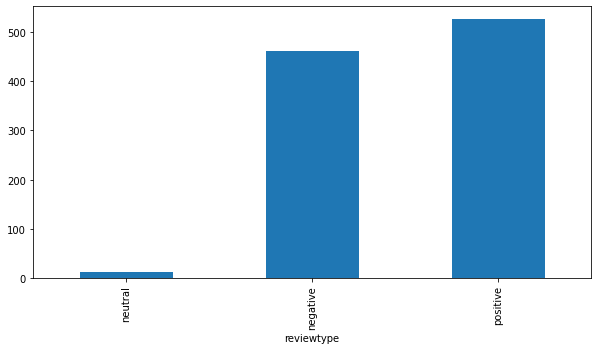

In [17]:
vader.groupby('reviewtype')['reviewtype'].count().sort_values(ascending=True).plot(kind='bar',figsize=(10,5))

In [44]:
order = vader.reviewtype.value_counts().sort_values(ascending= True).index

Text(0, 0.5, 'Count of reviews')

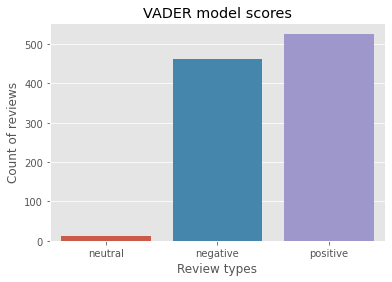

In [57]:
ax = sns.countplot(data = vader,x='reviewtype',order= order)
plt.title('VADER model scores')
plt.xlabel('Review types')
plt.ylabel('Count of reviews')

# BERT model

In [20]:
import transformers
from transformers import AutoTokenizer , AutoModelForSequenceClassification
import torch
from torch import argmax

In [21]:
bert_token = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
bert = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [22]:
bert_tokens =  bert_token.encode(example,return_tensors='pt')
result = bert(bert_tokens)

print(result)
int(torch.argmax(result.logits))+1

SequenceClassifierOutput(loss=None, logits=tensor([[ 2.7197,  2.8134,  0.7878, -1.9633, -3.4900]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


2

In [23]:
def ber_score(review):
    bert_tokens =  bert_token.encode(review,return_tensors='pt')
    result = bert(bert_tokens)
    return int(torch.argmax(result.logits))+1

In [24]:
bert_scores = {'reviews':[],'bert_scores':[]}
for i, review in tqdm(enumerate(reviewdf['reviews'])):
    review = review[:512]
    final_result = ber_score(review=review)
    bert_scores['reviews'].append(review)
    bert_scores['bert_scores'].append(final_result)



0it [00:00, ?it/s]

In [25]:
bert_scores = pd.DataFrame.from_dict(bert_scores)
bert_scores.head()

,reviews,bert_scores
0,Food was lousy. Who ever is planning the Asian...,2
1,Had the worst experience. The flight from Lond...,1
2,The ground staff were not helpful. Felt like a...,2
3,Second time BA Premium Economy in a newer airc...,4
4,They changed our Flights from Brussels to Lond...,1


In [26]:
bert_scores.iloc[3,0]

'Second time BA Premium Economy in a newer aircraft and yet another excellent experience. Despite a three hour delay and missing my connection in Hong Kong, this was a very pleasant flight. Seats are spacious and comfortable in Premium Economy in this layout, attitude of the cabin crew was excellent and food was good. They communicate well and rebooked my connection during the flight which brought peace of mind. A very pleasant experience in BA Premium Economy after a major disappointment in Club World earli'

In [27]:
fulldata =  bert_scores.merge(vader,how='inner')
fulldata.head()

,reviews,bert_scores,neg,neu,pos,compound,reviewtype
0,The ground staff were not helpful. Felt like a...,2,0.166,0.834,0.000,-0.8537,negative
1,At Copenhagen the most chaotic ticket counter ...,1,0.099,0.763,0.138,0.1015,positive
2,This is the worst airline. Not one thing went ...,1,0.320,0.680,0.000,-0.9392,negative
3,Worst aircraft I have ever flown. The seats we...,1,0.181,0.758,0.062,-0.8984,negative
4,I enjoyed my flight. The boarding was swift an...,4,0.071,0.743,0.186,0.8802,positive


In [41]:
order_asc = fulldata.groupby('bert_scores')['bert_scores'].count().sort_values(ascending=True).index

Text(0.5, 0, 'bert scores')

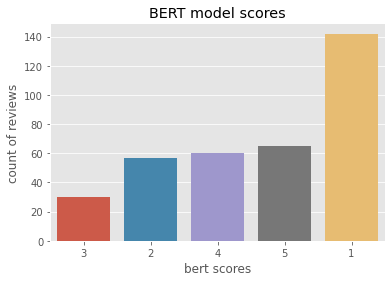

In [56]:
ax = sns.countplot(data=fulldata,x='bert_scores',order=order_asc)
plt.title('BERT model scores')
plt.ylabel('count of reviews')
plt.xlabel('bert scores')

In [48]:
corr_matrix  = fulldata.corr()
corr_matrix

,bert_scores,neg,neu,pos,compound
bert_scores,1.000000,-0.619490,-0.443836,0.776870,0.764776
neg,-0.619490,1.000000,-0.112040,-0.567702,-0.810997
neu,-0.443836,-0.112040,1.000000,-0.754438,-0.330885
pos,0.776870,-0.567702,-0.754438,1.000000,0.809783
compound,0.764776,-0.810997,-0.330885,0.809783,1.000000


Text(0.5, 0, 'bert scores')

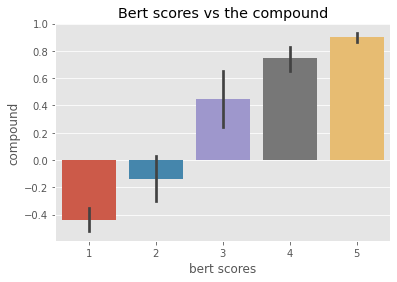

In [55]:
ax = sns.barplot(data=fulldata , x = 'bert_scores', y = 'compound')
plt.title('Bert scores vs the compound')
plt.xlabel('bert scores')

